# COP and COG estimation by linear regression
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the linear regression

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [1]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
 #               rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [2]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Tue Jan 11 17:32:20 2022 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [3]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))
PDSinfo[PDSinfo["Subject"]==33]

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


,Trial,Subject,Vision,Surface,Rep,Age,AgeGroup,Gender,Height,Mass,...,Nmedication,Medication,Ortho-Prosthesis,Ortho-Prosthesis2,Disability,Disability2,Falls12m,PhysicalActivity,Sequence,Date
384,PDS33OR1,33,Open,Rigid,1,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
385,PDS33OR2,33,Open,Rigid,2,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
386,PDS33OR3,33,Open,Rigid,3,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
387,PDS33OF1,33,Open,Foam,1,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
388,PDS33OF2,33,Open,Foam,2,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
389,PDS33OF3,33,Open,Foam,3,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
390,PDS33CR1,33,Closed,Rigid,1,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
391,PDS33CR2,33,Closed,Rigid,2,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
392,PDS33CR3,33,Closed,Rigid,3,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682
393,PDS33CF1,33,Closed,Foam,1,72.25,Old,F,1.54,62.0,...,6,"Angiotensin II receptor antagonist, Biguanide,...",Yes,"Corrective lens, Bridge teeh, PaceMaker",Yes,Hearing (Left ear),0,2,"CF, OR, CR, OF",2016-11-10 15:08:17.682


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

In [4]:
#trial=PDSinfo.loc[586]
re=PDSinfo.loc[PDSinfo['Subject']==49]
#print(trial['Trial'])
#print(trial['Subject'])
trial=re['Trial']
print(trial[1:2])

577    PDS49OR2
Name: Trial, dtype: object


### For all subjects

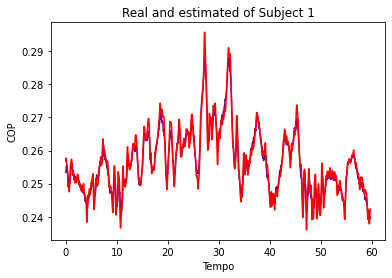

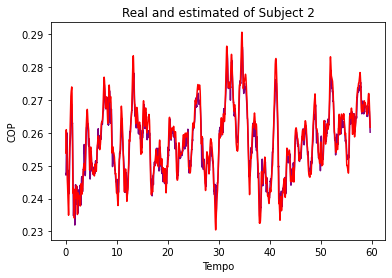

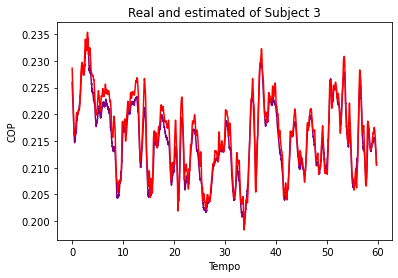

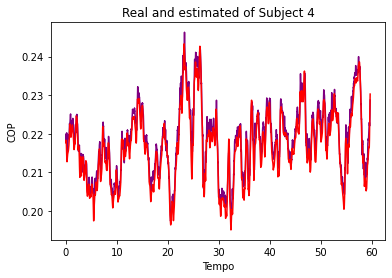

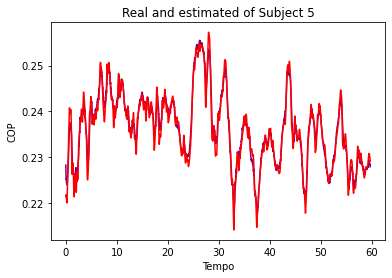

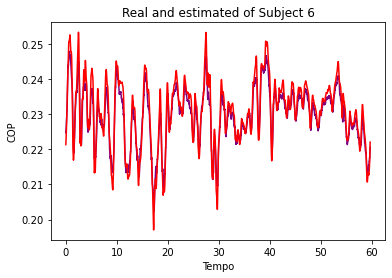

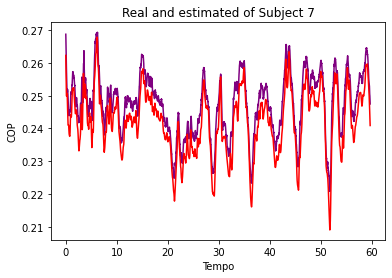

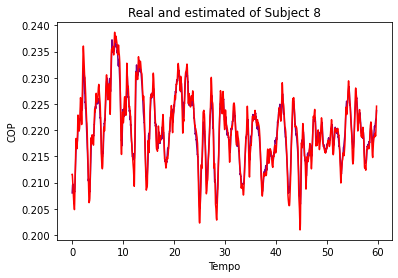

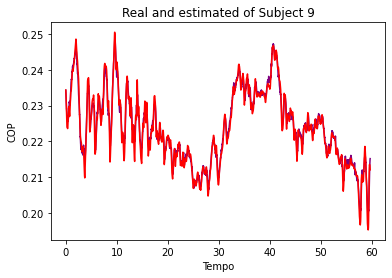

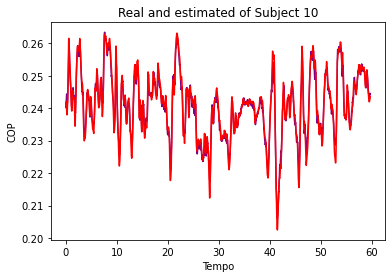

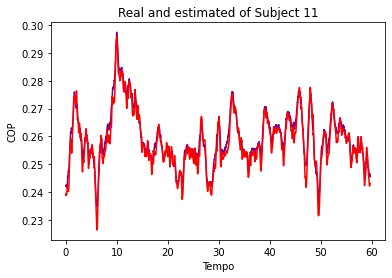

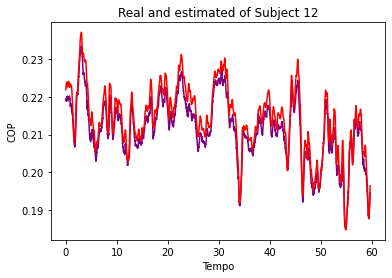

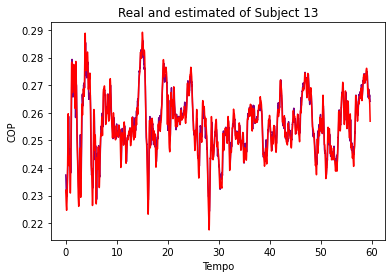

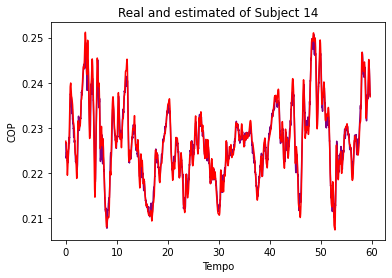

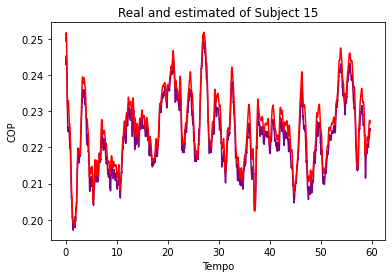

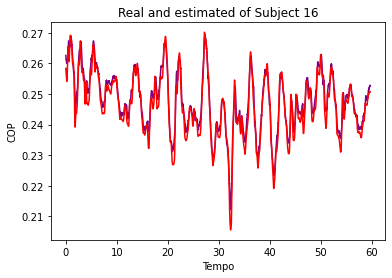

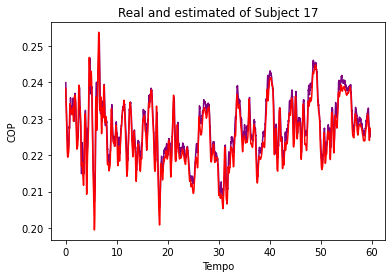

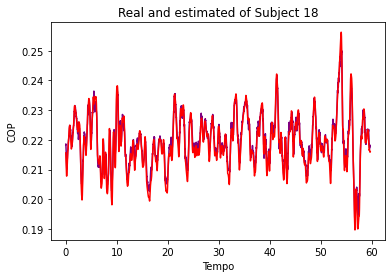

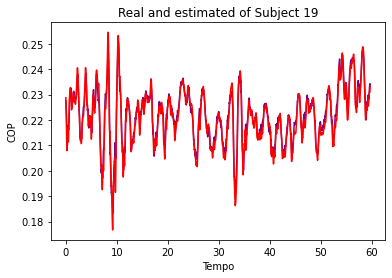

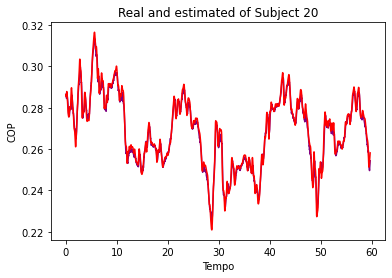

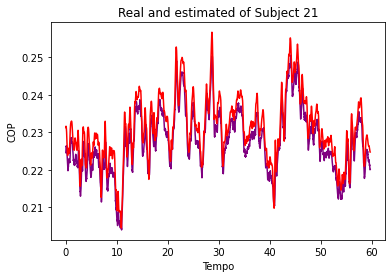

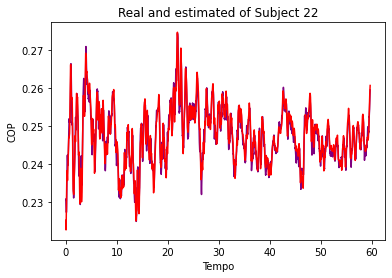

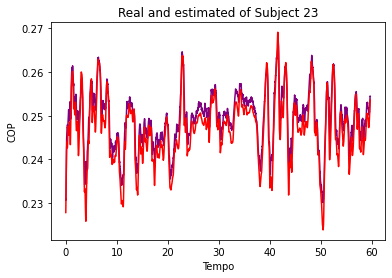

In [ ]:
from ipywidgets import widgets
for s in range(1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf=os.path.join(path2, PDSinfo.Trial[a]+'grf'+'.txt')
    fname_mkr=os.path.join(path2,PDSinfo.Trial[a]+'mkr'+'.txt')
    grf=pd.read_csv(fname_grf,delimiter='\t',header=0,engine='c')
    mkr=pd.read_csv(fname_mkr,delimiter='\t',header=0,engine='c')
    x=mkr['COG_X']
    y=grf['COPNET_X']
    t=mkr['Time']
    x0=np.array(x[:-30]).reshape(-1,1)
    y0=np.array(y[30:]).reshape(-1,1)
    for nt in range(1,30):
        x0=np.hstack((x0,np.array(x[nt:-30+nt]).reshape(-1,1)))
    c,d,_,_=np.linalg.lstsq(x0,y0,rcond=None)
    b=PDSinfo[PDSinfo['Subject']==s].index.tolist()[10]
    fname_grftest=os.path.join(path2,PDSinfo.Trial[b]+'grf'+'.txt')
    fname_mkrtest=os.path.join(path2,PDSinfo.Trial[b]+'mkr'+'.txt')
    grftest=pd.read_csv(fname_grftest,delimiter='\t',header=0,engine='c')
    mkrtest=pd.read_csv(fname_mkrtest,delimiter='\t',header=0,engine='c')
    x1=mkrtest['COG_X']
    y1=grftest['COPNET_X']
    x1test=np.array(x1[:-30]).reshape(-1,1)
    y1test=np.array(y1[30:]).reshape(-1,1)
    for nt in range (1,30):
        x1test=np.hstack((x1test,np.array(x1[nt:-30+nt]).reshape(-1,1)))
    yexttest=x1test@c
    graf1=plt.plot(t[:-30],yexttest,marker='',color='purple',linestyle='-')
    graf2=plt.plot(t[:-30],y1[30:],marker='',color='red',linestyle='-')
    plt.xlabel('Tempo')
    plt.ylabel('COP')
    plt.title('Real and estimated of Subject {}'.format(s))
    plt.show()

In [6]:
a=PDSinfo[PDSinfo['Subject']==49].index.tolist()[0:2]
print(a[0:2])

[576, 577]


In [7]:
fname_grf=os.path.join(path2, PDSinfo.Trial[44]+'grf'+'.txt')
fname_mkr=os.path.join(path2, PDSinfo.Trial[44]+'mkr'+'.txt')
grf=pd.read_csv(fname_grf, delimiter='\t',header=0,engine='c')
mkr=pd.read_csv(fname_mkr,delimiter='\t',header=0,engine='c')

Devemos calcular os coeficientes da equação que relaciona o COG com o COP

In [8]:
y=grf['COPNET_X']
x=mkr['COG_X']
t=mkr['Time']

First it is created the array with values of cop and cog, and then calculated their coefficients, in this case for Trial 150, subject 13.

In [9]:
x1=np.array(x[:-30]).reshape(-1,1)
y1=np.array(y[30:]).reshape(-1,1)
for nt in range(1,30):
    x1=np.hstack((x1,np.array(x[nt:-30+nt]).reshape(-1,1)))
#N=len(x1)
#f1=np.hstack((x1,npones((N,1))))
c,d,_,_=np.linalg.lstsq(x1,y1,rcond=None)

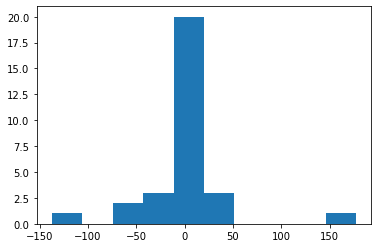

In [10]:
histo=matplotlib.pyplot.hist(c)

After the coefficients are calculated it is necessary to test the veracity of these values with other trials, for example 154

In [11]:
fname_grftest1=os.path.join(path2, PDSinfo.Trial[44]+'grf'+'.txt')
fname_mkrtest1=os.path.join(path2, PDSinfo.Trial[44]+'mkr'+'.txt')
grftest1=pd.read_csv(fname_grftest1, delimiter='\t', header=0, engine='c')
mkrtest1=pd.read_csv(fname_mkrtest1, delimiter='\t', header=0, engine='c')

In [12]:
u1=mkrtest1['COG_X']
v1=grftest1['COPNET_X']

Now it is done de arrays that gather the data from nt to nt-30 for trial 154

In [13]:
x1test1=np.array(u1[:-30]).reshape(-1,1)
y1test1=np.array(v1[30:]).reshape(-1,1)
for nt in range(1,30):
    x1test1=np.hstack((x1test1,np.array(u1[nt:-30+nt]).reshape(-1,1)))

It is time to plot the graphics with values of trial number 154 but using trial's 150 coeficient

[[0.1988516 ]
 [0.19902713]
 [0.19906917]
 ...
 [0.1916676 ]
 [0.19165263]
 [0.19171223]]


Text(0, 0.5, 'COP')

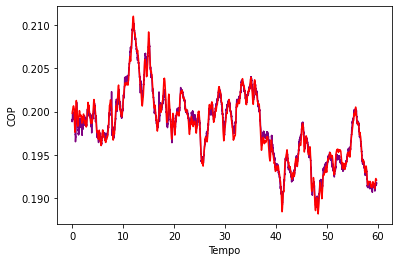

In [14]:
yexttest1=x1test1@c
print(yexttest1)
plt.plot(t[:-30],yexttest1,marker='', color='purple',linestyle='-')
plt.plot(t[:-30],v1[30:],marker='',color='red',linestyle='-')
plt.xlabel('Tempo')
plt.ylabel('COP')

Now it is calculated the mean square error:

In [15]:
yext1med=np.mean(yexttest1)
yreal1med=np.mean(v1[30:])
e1=np.sqrt(np.mean((yext1med-yreal1med)**2))
print(e1)

3.9126721168569745e-08


In [16]:
histtest=matplotlib.pyplot.hist(yext1)

NameError: name 'yext1' is not defined